In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.wcs.utils import wcs_to_celestial_frame
from astropy.table import Table
import astropy.units as u

plt.rcParams["figure.figsize"] = (12, 8)

In [10]:
def column_dtype_byte_to_string(df):
    byte_cols = df.select_dtypes(include=object).columns
    df[byte_cols] = df[byte_cols].apply(lambda col: col.str.decode("utf-8"))
    return df

### Shimewell-Katalog einlesen

In [21]:
tab = Table.read("../data/LOFAR_HBA_T1_DR1_catalog_v1.0.srl.fits").to_pandas()
tab = column_dtype_byte_to_string(tab)

In [12]:
tab[:600:100].T

,0,100,200,300,400,500
Source_Name,ILTJ122108.44+491340.9,ILTJ122035.85+490531.9,ILTJ122011.12+493506.7,ILTJ121944.57+485455.4,ILTJ121930.77+494052.1,ILTJ121912.38+495111.0
RA,185.285169,185.149359,185.046352,184.93572,184.878206,184.801578
E_RA,0.08507,0.717441,0.449239,0.457824,0.030999,0.289787
E_RA_tot,0.150016,0.728004,0.465922,0.474206,0.127392,0.31503
DEC,49.22804,49.092203,49.585197,48.915403,49.681157,49.85306
E_DEC,0.094025,0.520558,0.517024,0.325903,0.029731,0.313196
E_DEC_tot,0.155269,0.535022,0.531585,0.348541,0.12709,0.336689
Peak_flux,1.487188,0.286217,0.425906,0.361366,4.986902,0.601113
E_Peak_flux,0.052545,0.057533,0.061206,0.055136,0.056715,0.063862
E_Peak_flux_tot,0.302043,0.081159,0.10489,0.090903,0.998992,0.136132


In [13]:
tab.Mosaic_ID.unique()

array(['P22Hetdex04', 'P8Hetdex', 'P35Hetdex10', 'P182+55', 'P187+55',
       'P221+47', 'P210+47', 'P178+55', 'P211+50', 'P200+55', 'P223+50',
       'P218+55', 'P1Hetdex15', 'P227+50', 'P213+47', 'P223+55', 'P6',
       'P3Hetdex16', 'P38Hetdex07', 'P29Hetdex19', 'P219+50',
       'P37Hetdex15', 'P27Hetdex09', 'P214+55', 'P41Hetdex',
       'P34Hetdex06', 'P4Hetdex16', 'P209+55', 'P16Hetdex13',
       'P12Hetdex11', 'P15Hetdex13', 'P30Hetdex06', 'P205+55',
       'P42Hetdex07', 'P21', 'P25Hetdex09', 'P169+55', 'P219+52',
       'P26Hetdex03', 'P11Hetdex12', 'P19Hetdex17', 'P7Hetdex11',
       'P217+47', 'P164+55', 'P191+55', 'P223+52', 'P196+55',
       'P18Hetdex03', 'P14Hetdex04', 'P10Hetdex', 'P206+52',
       'P33Hetdex08', 'P227+53', 'P173+55', 'P225+47', 'P23Hetdex20',
       'P39Hetdex19', 'P206+50'], dtype=object)

## Vorselektierten Katalog von Mingo et. al. (2019) einlesen

Zeilen enthalten leider keine Referenz auf das Mosaik, in dem das jeweilige Objekt zu finden ist.

In [14]:
tab_mingo = Table.read("../data/Mingo19_LoMorph_Cat.fits").to_pandas()
tab_mingo = column_dtype_byte_to_string(tab_mingo)
tab_mingo.T

,0,1,2,3,4,5,6,7,8,9,...,5795,5796,5797,5798,5799,5800,5801,5802,5803,5804
Source_Name,ILTJ104416.22+524037.3,ILTJ104438.12+521539.4,ILTJ104450.87+513440.6,ILTJ104457.50+514630.7,ILTJ104513.27+530255.8,ILTJ104514.35+510848.2,ILTJ104517.40+545638.3,ILTJ104540.87+522245.2,ILTJ104542.54+525111.5,ILTJ104543.54+525016.4,...,ILTJ151909.61+531710.6,ILTJ151937.51+534252.7,ILTJ151949.13+520456.7,ILTJ151957.86+511848.3,ILTJ152107.83+524130.9,ILTJ152116.38+524332.9,ILTJ152256.21+524309.6,ILTJ152258.62+523341.9,ILTJ152312.42+520302.7,ILTJ152320.64+521000.1
RA,161.0676,161.158827,161.211956,161.23958,161.305297,161.309782,161.322487,161.420297,161.427253,161.431419,...,229.790035,229.906284,229.954704,229.991096,230.282642,230.318263,230.734202,230.744231,230.801735,230.835991
DEC,52.677027,52.260953,51.577963,51.775198,53.048845,51.146748,54.943977,52.379236,52.853213,52.837889,...,53.286293,53.714652,52.08244,51.313418,52.691937,52.725825,52.719353,52.561653,52.050766,52.166697
LM_dec_size,102.845758,69.227885,37.289409,32.345788,26.024027,34.007352,19.091883,37.016888,35.623026,117.728501,...,29.163333,55.41886,26.367594,55.5,40.749233,7.5,44.547727,49.5,229.465684,15.074813
LM_Flux,301.631413,320.076614,2.432213,49.776175,9.068471,33.965458,3.944619,34.997111,1531.843249,404.435047,...,19.076174,2811.843293,11.462038,42.33654,13.649579,1.683578,89.476674,52.107544,470.949245,6.404549
FR1,True,True,False,False,True,True,True,False,False,True,...,True,False,True,True,True,False,False,False,False,False
FR2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
Indeterminate,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
Small,False,False,True,True,True,True,True,True,True,False,...,True,False,True,False,False,True,False,False,False,True
NAT,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [15]:
tab_mingo

,Source_Name,RA,DEC,LM_dec_size,LM_Flux,FR1,FR2,Indeterminate,Small,NAT,WAT,D-D
0,ILTJ104416.22+524037.3,161.067600,52.677027,102.845758,301.631413,True,False,False,False,False,True,False
1,ILTJ104438.12+521539.4,161.158827,52.260953,69.227885,320.076614,True,False,False,False,False,False,False
2,ILTJ104450.87+513440.6,161.211956,51.577963,37.289409,2.432213,False,True,False,True,False,False,False
3,ILTJ104457.50+514630.7,161.239580,51.775198,32.345788,49.776175,False,False,True,True,False,False,False
4,ILTJ104513.27+530255.8,161.305297,53.048845,26.024027,9.068471,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,ILTJ152116.38+524332.9,230.318263,52.725825,7.500000,1.683578,False,False,False,True,False,False,False
5801,ILTJ152256.21+524309.6,230.734202,52.719353,44.547727,89.476674,False,False,True,False,False,False,False
5802,ILTJ152258.62+523341.9,230.744231,52.561653,49.500000,52.107544,False,True,False,False,False,False,False
5803,ILTJ152312.42+520302.7,230.801735,52.050766,229.465684,470.949245,False,False,True,False,False,False,False


Mosaikinformation lässt sich bei 4565/5804 Objekten aus dem Shimwell-Katalog übernehmen. Was ist mit den übrigen 1200 Objekten?

In [16]:
#tab_merge = pd.merge(tab[["Source_Name", "Mosaic_ID"]], tab_mingo, on="Source_Name")
tab_merge = pd.merge(tab, tab_mingo, on="Source_Name")
tab_merge.head()

,Source_Name,RA_x,E_RA,E_RA_tot,DEC_x,E_DEC,E_DEC_tot,Peak_flux,E_Peak_flux,E_Peak_flux_tot,...,DEC_y,LM_dec_size,LM_Flux,FR1,FR2,Indeterminate,Small,NAT,WAT,D-D
0,ILTJ122046.90+501856.4,185.195427,0.009952,0.123963,50.315670,0.012941,0.124239,33.503893,0.106009,6.701617,...,50.315670,19.956202,64.646346,False,False,False,True,False,False,False
1,ILTJ122036.65+503026.9,185.152729,0.630841,0.642828,50.507472,0.707795,0.718500,1.403881,0.104044,0.299434,...,50.507472,28.500000,6.381672,False,True,False,True,False,False,False
2,ILTJ122020.65+493520.0,185.086036,0.814015,0.823340,49.588908,0.759974,0.769953,0.507827,0.037278,0.108191,...,49.588908,34.467376,4.204999,True,False,False,True,False,False,False
3,ILTJ121927.97+491110.4,184.866523,0.039115,0.129606,49.186234,0.085220,0.150101,5.576875,0.056615,1.116811,...,49.186234,48.466483,20.627553,False,False,True,False,False,False,False
4,ILTJ121904.11+492443.1,184.767137,0.259781,0.287670,49.411987,0.595037,0.607731,1.112147,0.058475,0.229987,...,49.411987,20.012496,3.868182,False,False,False,True,False,False,False


## Filtern nach Objekten in Mosaik `P205+55`

In [17]:
tab_205 = tab[tab.Mosaic_ID.str.contains("205\+55")]
tab_205.head()

,Source_Name,RA,E_RA,E_RA_tot,DEC,E_DEC,E_DEC_tot,Peak_flux,E_Peak_flux,E_Peak_flux_tot,...,DC_Min,E_DC_Min,PA,E_PA,DC_PA,E_DC_PA,Isl_rms,S_Code,Mosaic_ID,Isl_id
182259,ILTJ134917.04+535737.2,207.320991,0.918365,0.925241,53.960334,0.307251,0.327231,0.342880,0.058164,0.089921,...,0.000000,0.598017,102.776778,15.348846,0.000000,15.348846,0.060391,S,P205+55,700
182260,ILTJ134916.45+535801.7,207.318522,1.005754,1.012037,53.967151,1.114827,1.120498,0.359912,0.054929,0.090547,...,9.280158,1.552865,141.654091,18.888470,141.654091,18.888470,0.061322,S,P205+55,703
182261,ILTJ134915.23+540433.5,207.313443,0.494325,0.506985,54.075982,0.673964,0.683305,0.312100,0.058940,0.085850,...,0.000000,0.912721,30.876257,28.355189,30.876257,28.355189,0.057573,S,P205+55,721
182262,ILTJ134915.03+540812.1,207.312622,0.347668,0.365446,54.136707,0.210964,0.239130,0.554670,0.056204,0.124359,...,0.000000,0.375646,115.863705,13.531947,0.000000,13.531947,0.059800,S,P205+55,723
182263,ILTJ134911.34+540239.4,207.297256,0.669693,0.679092,54.044286,0.875819,0.883027,0.341026,0.063231,0.093006,...,0.000000,0.848233,146.572349,18.841840,146.572349,18.841840,0.062214,S,P205+55,737


In [18]:
tab_merge_205 = tab_merge[tab_merge.Mosaic_ID.str.contains("205\+55")]
tab_merge_205.head().T

,2560,2561,2562,2563,2564
Source_Name,ILTJ134829.35+542642.9,ILTJ134815.13+535942.0,ILTJ134820.70+554040.6,ILTJ134752.64+555046.9,ILTJ134735.43+545320.4
RA_x,207.122311,207.06305,207.086253,206.969343,206.89763
E_RA,0.071687,0.568362,0.465603,0.038557,0.424055
E_RA_tot,0.133478,0.579407,0.479023,0.119013,0.438748
DEC_x,54.445275,53.995023,55.677962,55.84636,54.889017
E_DEC,0.095823,0.412279,0.371643,0.068129,0.458966
E_DEC_tot,0.14785,0.427378,0.388325,0.131602,0.472575
Peak_flux,20.976495,0.549089,4.020298,5.959281,0.650002
E_Peak_flux,0.070582,0.063622,0.074875,0.076494,0.069507
E_Peak_flux_tot,4.195893,0.126916,0.807538,1.194308,0.147416


## Mosaik / Bild `P205+55` einlesen

In [20]:
hdu = fits.open("../data/P205+55-mosaic.fits")[0]
hdu

## Erklärung für Header Einträge
https://www.aanda.org/articles/aa/full/2002/45/aah3859/aah3859.right.html

In [12]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8932                                                  
NAXIS2  =                 8932                                                  
WCSAXES =                    2                                                  
CTYPE1  = 'RA---SIN'                                                            
CTYPE2  = 'DEC--SIN'                                                            
CUNIT1  = 'deg     '                                                            
CUNIT2  = 'deg     '                                                            
CRPIX1  =                 4466                                                  
CRPIX2  =                 4466                                                  
CRVAL1  =        205.0552666

 Mosaic header in WCS-Objekt einlesen

In [13]:
wcs = WCS(hdu.header)

In [14]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 205.055266667  54.8981944444  
CRPIX : 4466.0  4466.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00041666666666666  0.000416666666666666  
NAXIS : 8932  8932

In [15]:
wcs.wcs_pix2world([
    (0, 0), 
    (8932, 0), 
    (0 ,8932),
    (8932,8932)
], 0)

array([[208.14784917,  52.99634126],
       [201.9613002 ,  52.99630443],
       [208.44716637,  56.71468256],
       [201.6618495 ,  56.71464217]])

In [16]:
wcs.wcs_world2pix([(205, 54)], 0)

array([[4542.96382424, 2309.45238814]])

## Projektion mit WCS Achsen plotten

In [17]:
import matplotlib.pyplot as plt

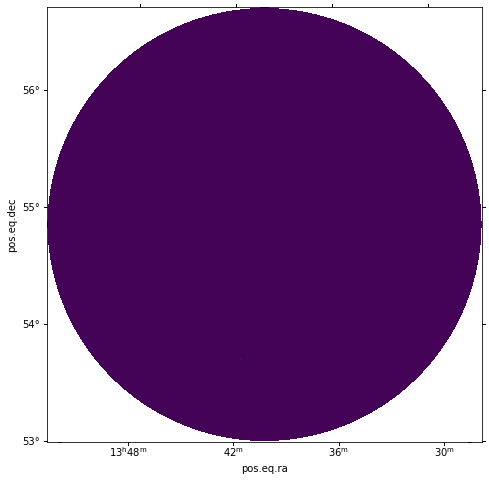

In [18]:
ax = plt.subplot(projection=wcs)
ax.imshow(hdu.data);

In [64]:
def get_coordinates(df, idx):
    return df.iloc[idx,:][["RA_x", "E_RA", "E_RA_tot", "DEC_x", "E_DEC", "E_DEC_tot"]].to_dict()

def get_rectangle(df, idx):
    ra, e_ra, e_ra_to, dec, e_dec, e_dec_tot = get_coordinates(df, idx).values()    
    return [
        (ra - e_ra, dec - e_dec),
        (ra - e_ra, dec + e_dec),
        (ra + e_ra, dec - e_dec),
        (ra + e_ra, dec + e_dec),
    ]

def get_rectangle_tot(df, idx):
    ra, e_ra, e_ra_tot, dec, e_dec, e_dec_tot = get_coordinates(df, idx).values()    
    return [
        (ra - e_ra_tot, dec - e_dec_tot),
        (ra - e_ra_tot, dec + e_dec_tot),
        (ra + e_ra_tot, dec - e_dec_tot),
        (ra + e_ra_tot, dec + e_dec_tot),
    ]


get_rectangle(tab_merge_205, 2)


[(206.62065004551351, 55.306318803584865),
 (206.62065004551351, 56.04960497710753),
 (207.55185528672558, 55.306318803584865),
 (207.55185528672558, 56.04960497710753)]

In [69]:
from astropy.nddata import Cutout2D

In [73]:
tab_merge_205.iloc[1, [1,4]]

RA_x     207.06305
DEC_x    53.995023
Name: 2561, dtype: object

[203.27955957716028, 54.80219578690197]


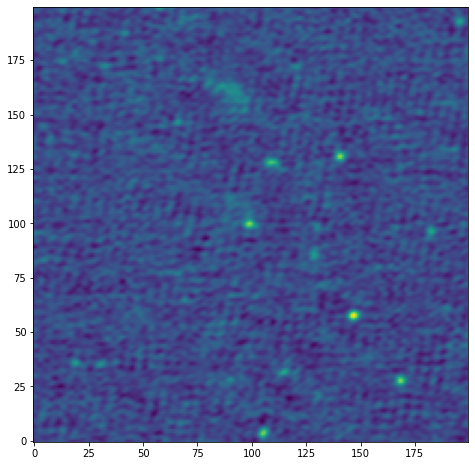

In [115]:
position = tab_205.iloc[5066, [1,4]].tolist()
print(position)
position = wcs.wcs_world2pix([position], 0)
size = u.Quantity((1.5, 2.5), u.arcsec)
cutout = Cutout2D(hdu.data, position[0], 200)
plt.imshow(cutout.data, origin='lower')  



In [117]:
cutout.data.shape

(200, 200)

In [68]:
wcs.wcs_world2pix(get_rectangle_tot(tab_merge_205, 2), 0)

array([[2344.30404806, 5427.95474471],
       [2385.99637938, 7291.26430304],
       [1035.84890347, 5465.91667217],
       [1103.26512292, 7328.47990887]])

In [44]:
hpc_frame = wcs_to_celestial_frame(wcs)
hpc_frame

<ICRS Frame>

In [45]:
SkyCoord(100*u.arcsec, -100*u.arcsec, frame=hpc_frame)

<SkyCoord (ICRS): (ra, dec) in deg
    (0.02777778, -0.02777778)>